In [1]:
# create a box plot for a categorical variable 'name' against the 'price' column in the DataFrame df.
# use an undefined function IQR('odometer') to calculate the upper and lower limits for the 'odometer' column and applies outlier removal. 
def boxplot_cat(name):
    fig = plt.figure(figsize=(15,8))
    sns.boxplot(data=df, x=name, y='price')
    plt.xticks(rotation=90)
    plt.show()


In [2]:
import pandas as pd
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

In [3]:
# calculate the Interquartile Range (IQR) and the upper and lower bounds for outlier detection for a price column.
# identifying potential outliers in the 'price' column based on the IQR method.
def IQR(name):
    global new_df
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    print(f"Q1  {name}  {Q1}, Q3  {name}  {Q3}")
    print("---------------------------------------")
    iqr = Q3 - Q1
    print(f"IQR for {name} is equal to {iqr}")
    print("---------------------------------------")
    upper_limit = Q1 + 1.5 * iqr
    lower_limit = df[name].quantile(0.15)
    
    return (upper_limit,lower_limit)



In [4]:
# box plot representing the distribution of values in the 'price' column
# The box plot shows the median, quartiles, and any potential outliers in the data.
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=df[name], color='#FFA570')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')


# Import Libraries 

In [5]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


# Data preprocessing 

In [6]:
#reads a CSV file into a DataFrame 
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


In [7]:
#removes the first two columns from the DataFrame.
df = df.iloc[:,2:]

### 1. Drop colunms

here we want to drop some columns and the reason for that the following :

1. `id` and `Unnamed` : in this types of feature we don't need it at all because it's doesn't effect in our model

2. `lat` and `long` : this type of feature contain irrelative feature  .

3. `posting_date` : as we can see in the data all posting_date are in the same year and the month as well so its mean that its **constance** , the second reason this type of features its also irrelative feature .

4. `size` : as we can see in the number of null_value we can see that's more than 80% of the data is null so it'll effects badly to our model so we prefer to delete it.

5. `state` : the city that the car are in their doesn't matter because it doesn't effect in the price of the car


In [8]:
#drops four columns ('size', 'lat', 'long', and 'posting_date') from the DataFrame 
df.drop(labels=['size','lat','long','posting_date'],inplace=True,axis=1)

In [9]:
# drops rows from the DataFrame where all of the specified columns ('cylinders', 'condition', 'drive', 'type') have missing values (NaNs). 
df.dropna(subset=['cylinders','condition','drive','type'],how='all',inplace=True)

                               *    *   *

### 3. Categorical data

#    *    *   *

the numerical data here:
##### 1. manufacturer
##### 2. model
##### 3. condition
##### 4. cylinders
##### 5. fuel
##### 6. title_status
##### 7 transmission
##### 8. drive
##### 9. type
##### 10. paint_color

In [10]:
df.describe(include=["object"]).T

,count,unique,top,freq
manufacturer,251435,41,ford,42432
model,260395,22654,f-150,4950
condition,174025,6,good,84306
cylinders,170829,8,6 cylinders,64825
fuel,259037,5,gas,217454
title_status,255404,6,clean,247371
transmission,260395,3,automatic,202643
drive,202042,3,4wd,90054
type,227533,13,sedan,59518
paint_color,201074,12,white,53526


***
## Numarical Data
the numerical data here:
##### 1. year
##### 2. odometer
##### 3. price
***
### `price`

In [11]:
df.describe()

,year,odometer,price
count,260395.000000,2.603950e+05,2.603950e+05
mean,2011.617039,9.392068e+04,4.450733e+04
std,8.852498,1.787246e+05,8.207653e+06
min,1900.000000,0.000000e+00,0.000000e+00
25%,2009.000000,3.631550e+04,6.200000e+03
50%,2014.000000,8.267100e+04,1.456200e+04
75%,2017.000000,1.303705e+05,2.699000e+04
max,2022.000000,1.000000e+07,3.736929e+09


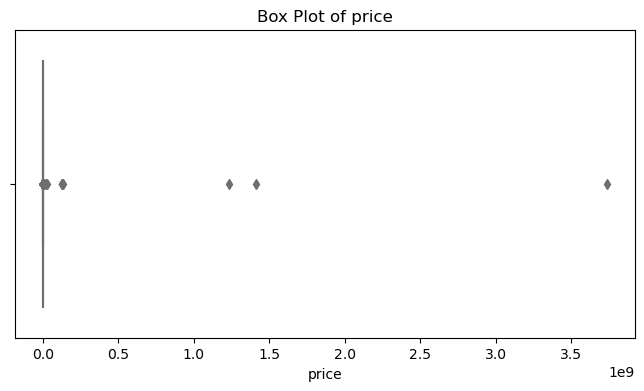

In [12]:
box_plot('price')

as we can see they are a lots of outliers in these columns,the Outliers reduces the accuracy of a model. We have to detect outliers and remove them.


now i want to apply the IQR if you want more information about this i recommend the following video that i take the solution from it
> https://www.youtube.com/watch?v=A3gClkblXK8

#### IQR implementation

In [13]:
upper_limit_price,lower_limit_price =IQR('price')

Q1  price  6200.0, Q3  price  26990.0
---------------------------------------
IQR for price is equal to 20790.0
---------------------------------------


In [14]:
#removes potential outliers with 'price' values above the calculated upper_limit_price 
#removes any rows with 'price' values of 0 from the DataFrame
df = df[(df['price'] < upper_limit_price) & (df['price'] > 0)]

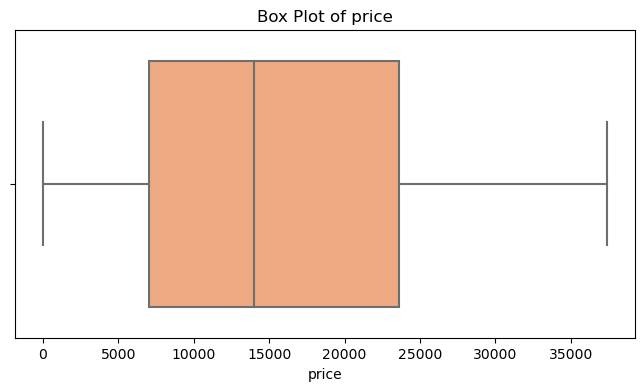

In [15]:
box_plot('price')

### `Year`

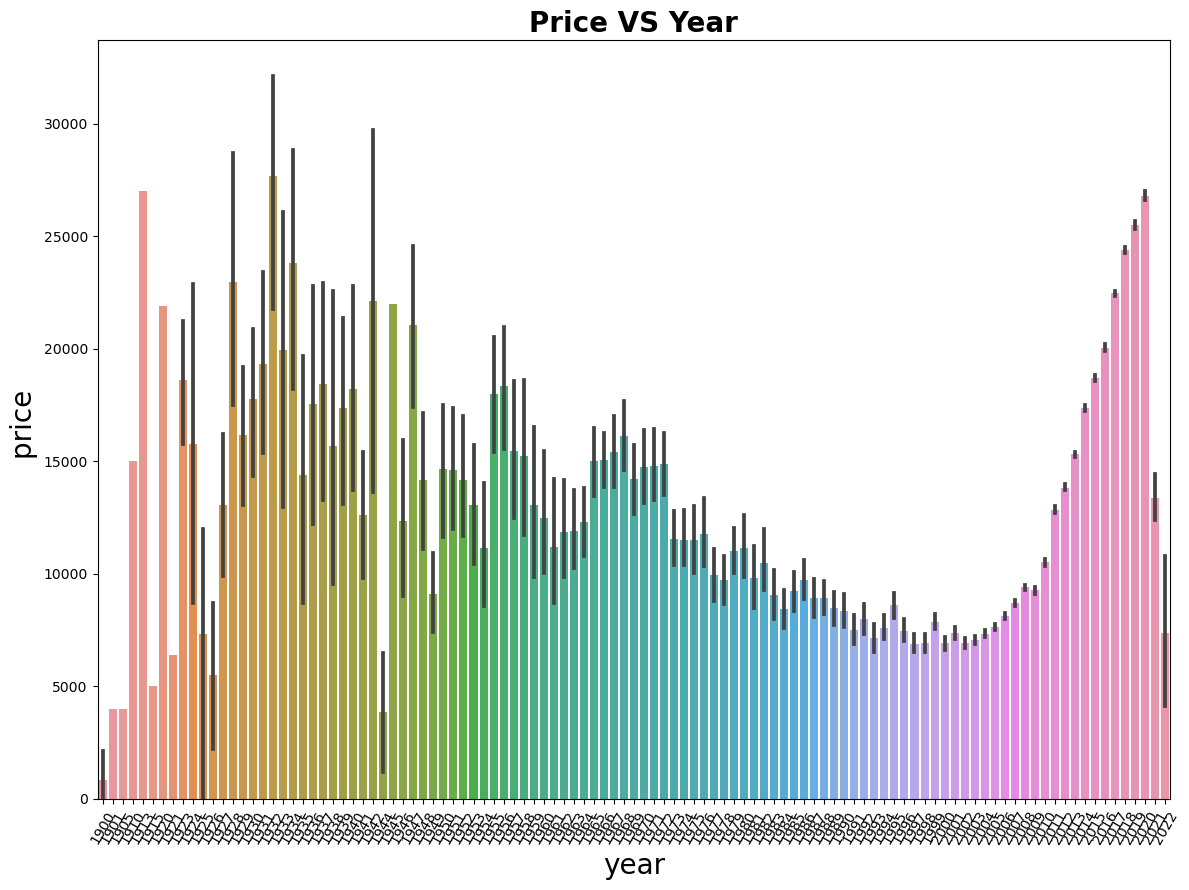

In [16]:
# visualizes the relationship between the 'year' and 'price' columns in the df
df['year'] = df['year'].astype(int)
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=df['price'],x=df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize =20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996


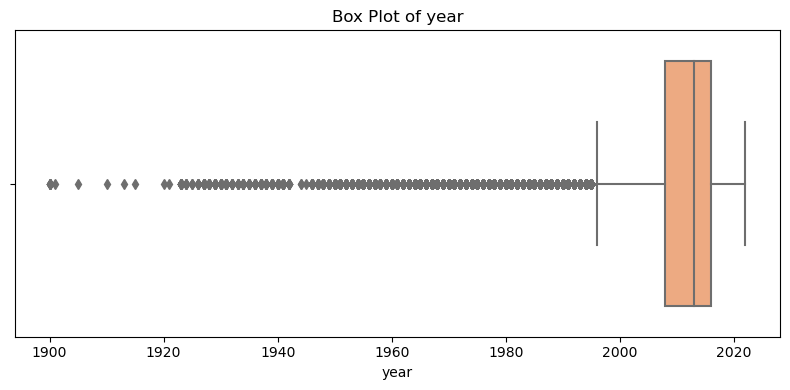

In [17]:
box_plot('year')

In [18]:
# The resulting DataFrame df will contain only rows where the 'year' is greater than 1996
df = df[df['year'] > 1996]
df.shape

(206059, 14)

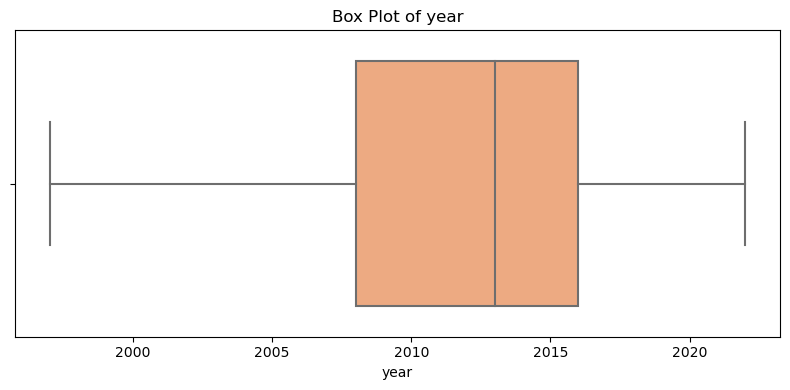

In [19]:
box_plot('year')

In [20]:
# subtracts the 'year' column values from 2023 
df['year'] = 2023 - df['year']

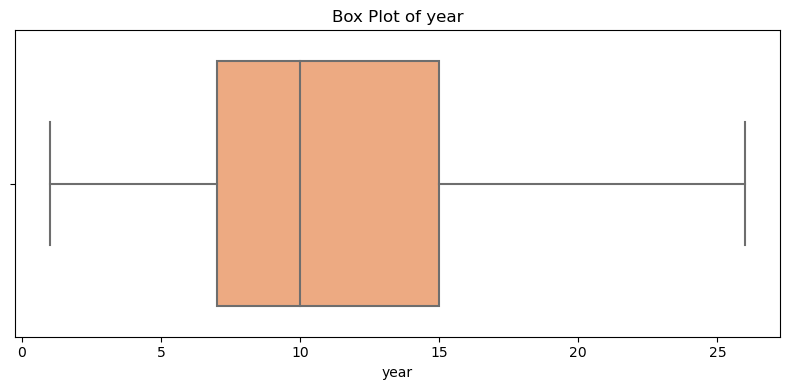

In [21]:
box_plot('year')

In [22]:
df['year'].head()

0    16
1    15
2    20
4    15
5    13
Name: year, dtype: int32

# Condition

-The misssing values in the condition can be found using odometer as mileage affects condition of car.

-Finding the mean value of odometer readings grouping by there conditions

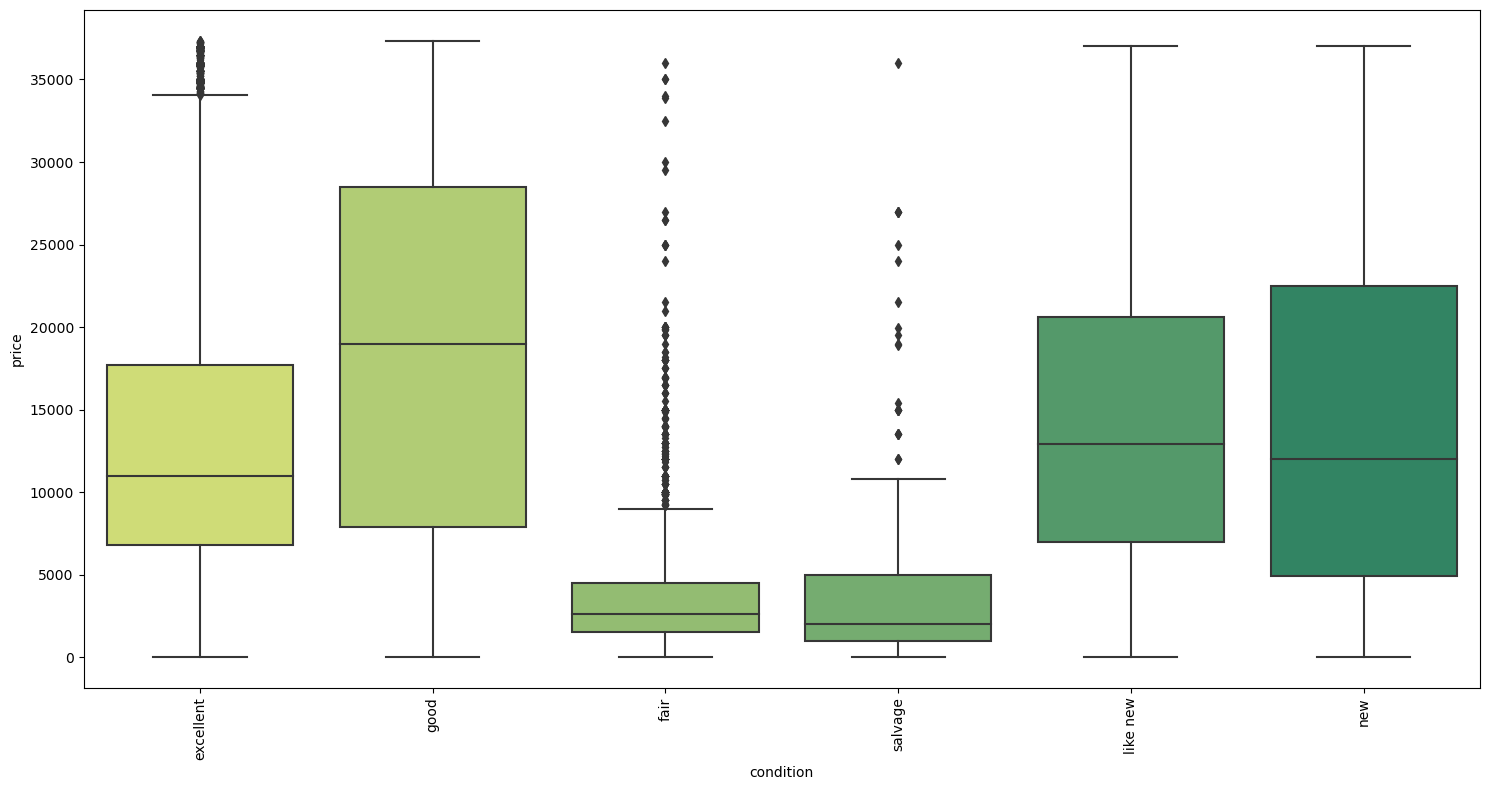

In [23]:
boxplot_cat('condition')

In [24]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [25]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 89395.91
Excellent average odometer: 110816.87
Good average odometer: 85956.24
Fair average odometer: 190257.27
Salvage average odometer: 210141.25


these are mean values regarding each condition.

now these can be used to group the odometer readings which have nan values in condition.

In [26]:
# sets the 'condition' of cars to 'new' for those rows where the 'year' is greater than or equal to 2019 and the 'condition' value is missing (NaN). 
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

the values are being filled by the values from above calculated mean value ranges


In [27]:
# fills in the missing condition information based on the car's odometer reading and the average odometer values for each condition.
# sets the 'condition' of cars based on specific odometer ranges and corresponding condition averages, and only for rows where the 'condition' value was missing (NaN) before.

df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

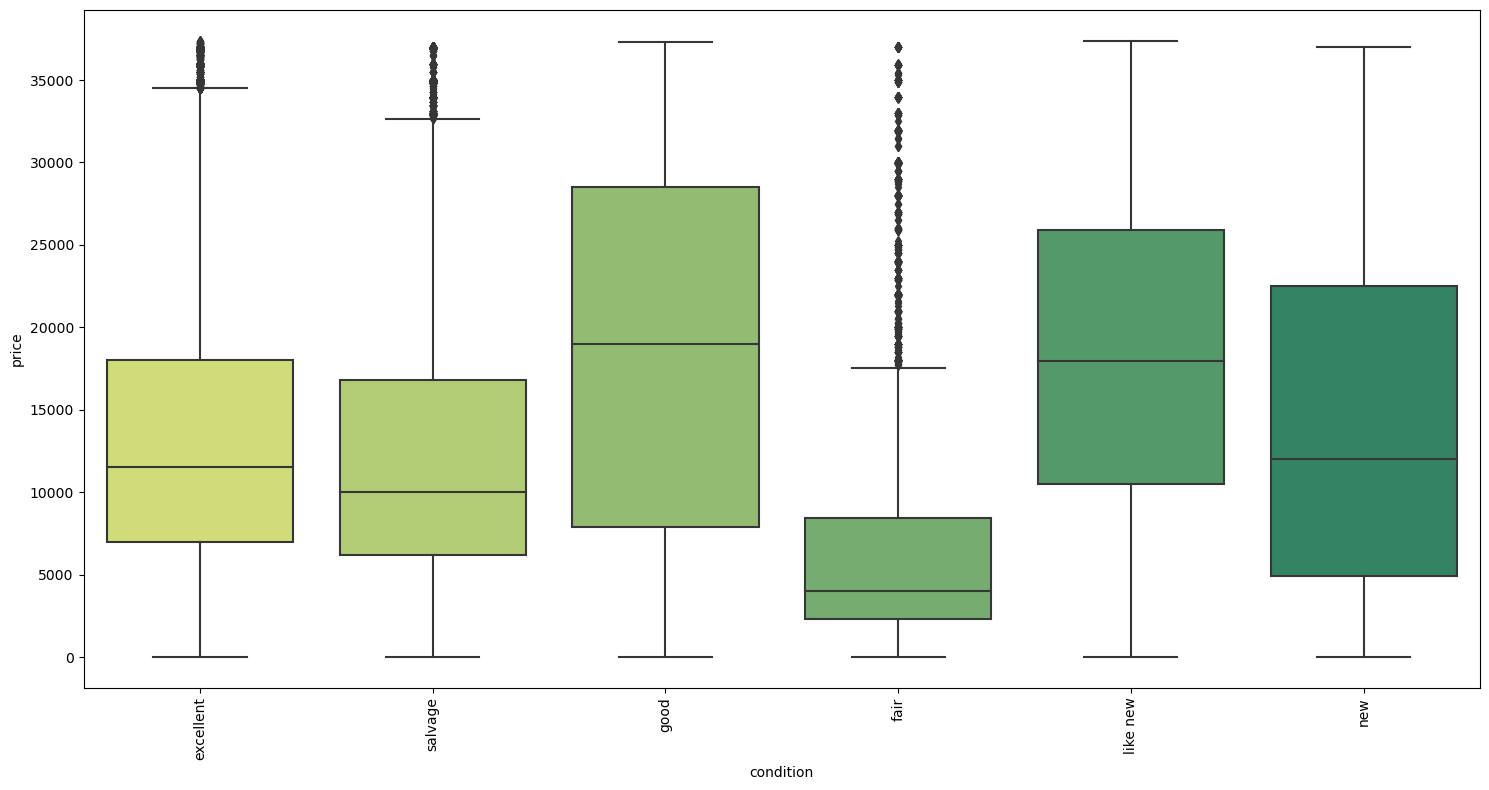

In [28]:
boxplot_cat('condition')

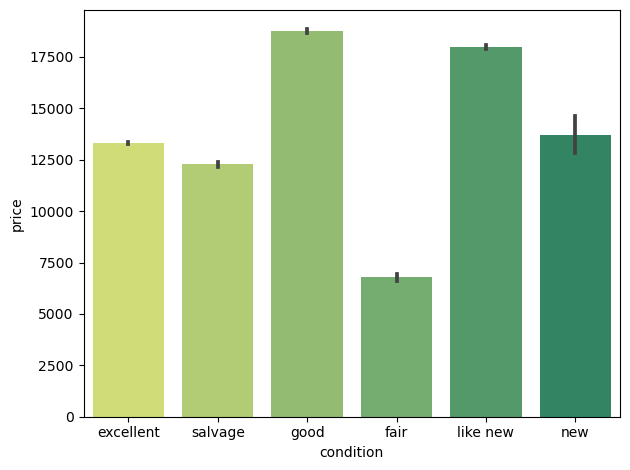

In [29]:
ax = sns.barplot(x="condition", y="price", data=df)

In [30]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,6913600,33.552
drive,4691000,22.765
paint_color,4571400,22.185
type,2573300,12.488
manufacturer,592500,2.875
title_status,449100,2.179
fuel,121700,0.591
year,0,0.000
model,0,0.000
condition,0,0.000


In [31]:
df['condition']

0         excellent
1           salvage
2           salvage
4              good
5         excellent
            ...    
290119         good
290120     like new
290125         good
290126    excellent
290127         good
Name: condition, Length: 206059, dtype: object

# Manufacturer

In [32]:
manufacturer_values = df['manufacturer'].value_counts()

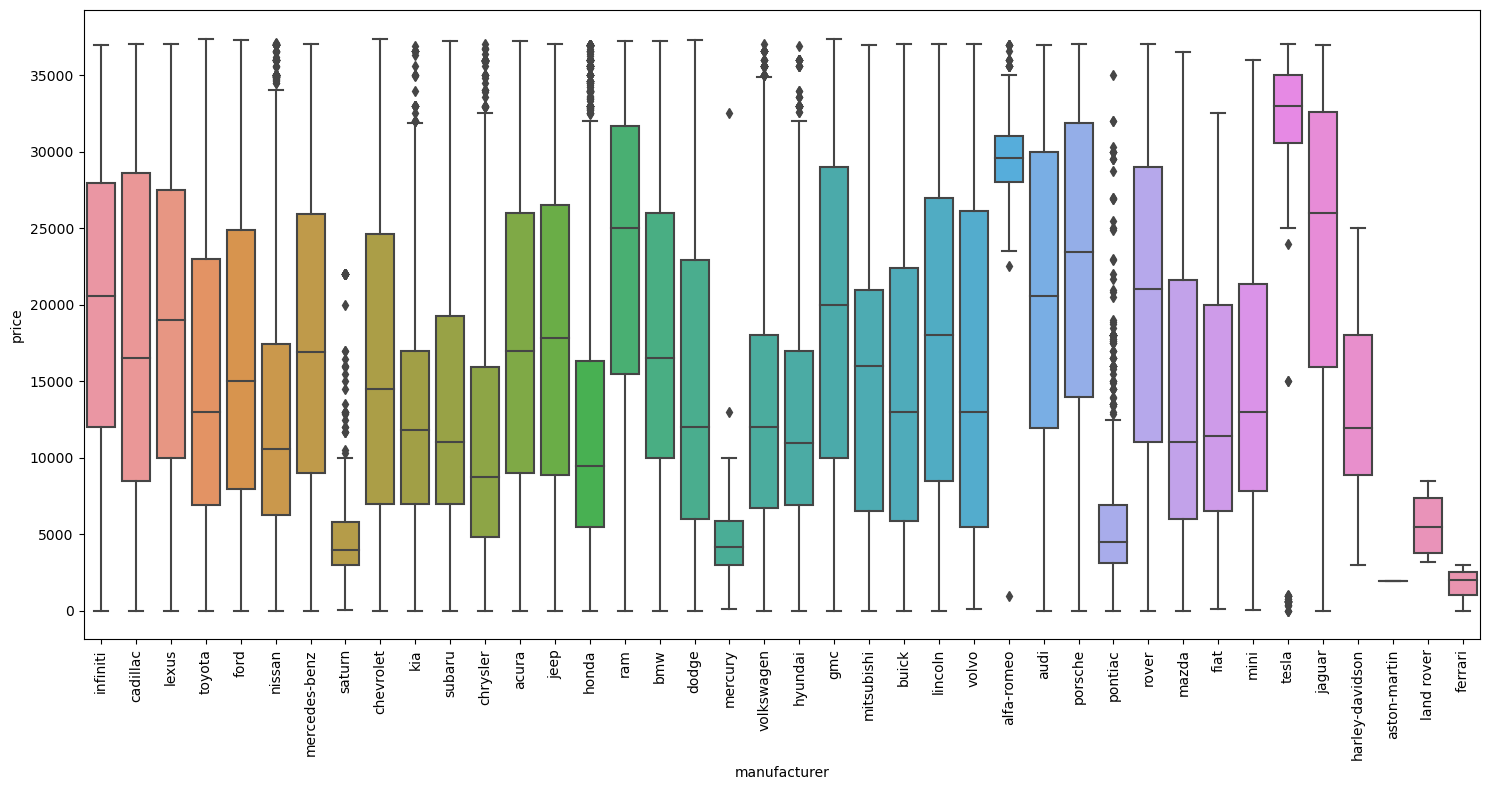

In [33]:
boxplot_cat('manufacturer')

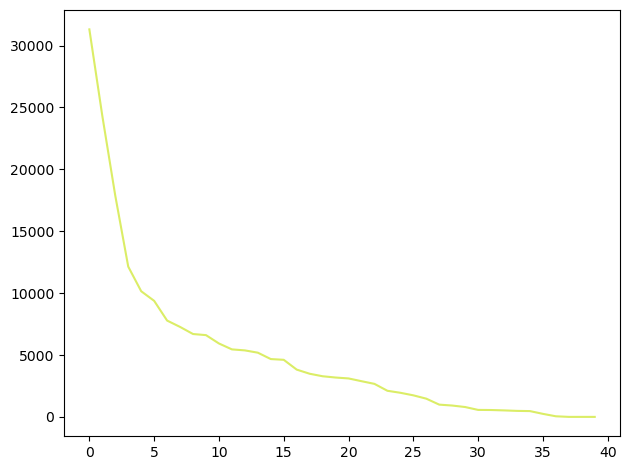

In [34]:
plt.plot(range(len(manufacturer_values)), manufacturer_values)

In [35]:
# Takes the 'manufacturer' column in df, checks if each element is one of the top 20 most frequent manufacturers, and keeps the original manufacturer name if it is in the top 20.
# If the manufacturer is not in the top 20, it replaces the name with 'others'.

df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

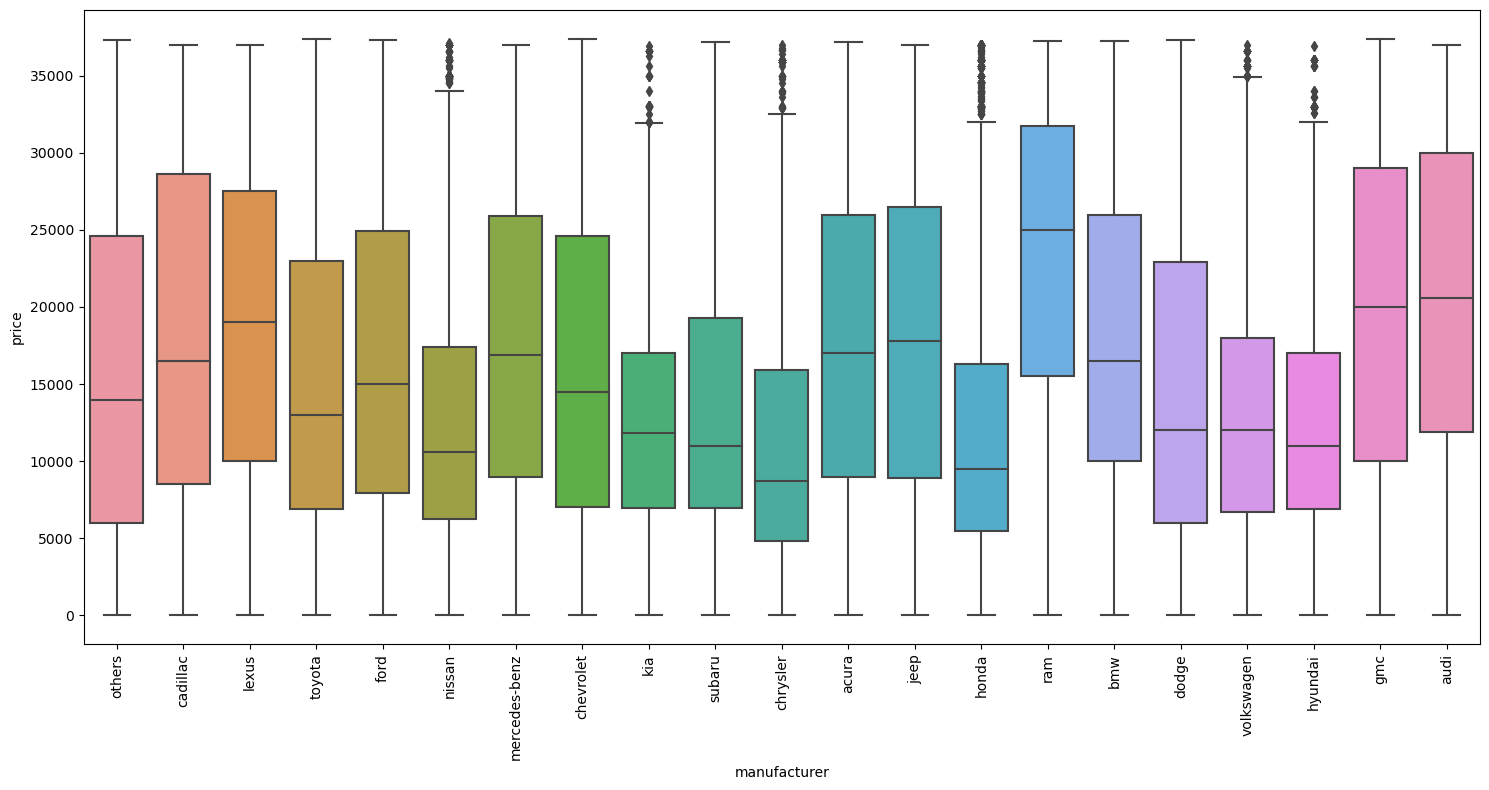

In [36]:
boxplot_cat('manufacturer')

In [37]:
df['manufacturer'].value_counts()

ford             31303
others           27522
chevrolet        24315
toyota           17868
honda            12141
nissan           10152
jeep              9376
bmw               7783
gmc               7270
dodge             6697
ram               6608
hyundai           5933
subaru            5456
volkswagen        5375
mercedes-benz     5190
kia               4675
lexus             4614
audi              3823
cadillac          3489
chrysler          3286
acura             3183
Name: manufacturer, dtype: int64

### `Model`

In [38]:
model_values = df['model'].value_counts()

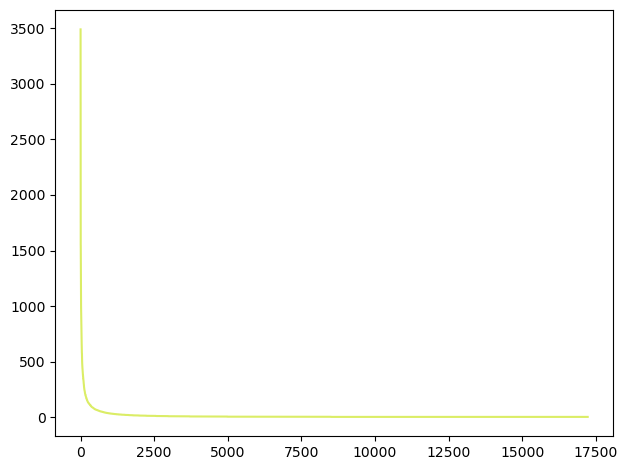

In [39]:
plt.plot(range(len(model_values)),model_values)

In [40]:
# checks if each car model (represented by x) is one of the top 50 most frequent models, and keeps the original model name if it is in the top 50. 
# If the model is not in the top 50, it replaces the name with 'others'. 

df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [41]:
# print the name of each column in the DataFrame along with the count of unique values in that column
for i in df.columns:
    print(i, len(df[i].value_counts().index))

year 26
manufacturer 21
model 51
condition 6
cylinders 8
fuel 5
odometer 69534
title_status 6
transmission 3
drive 3
type 13
paint_color 12
state 51
price 10038


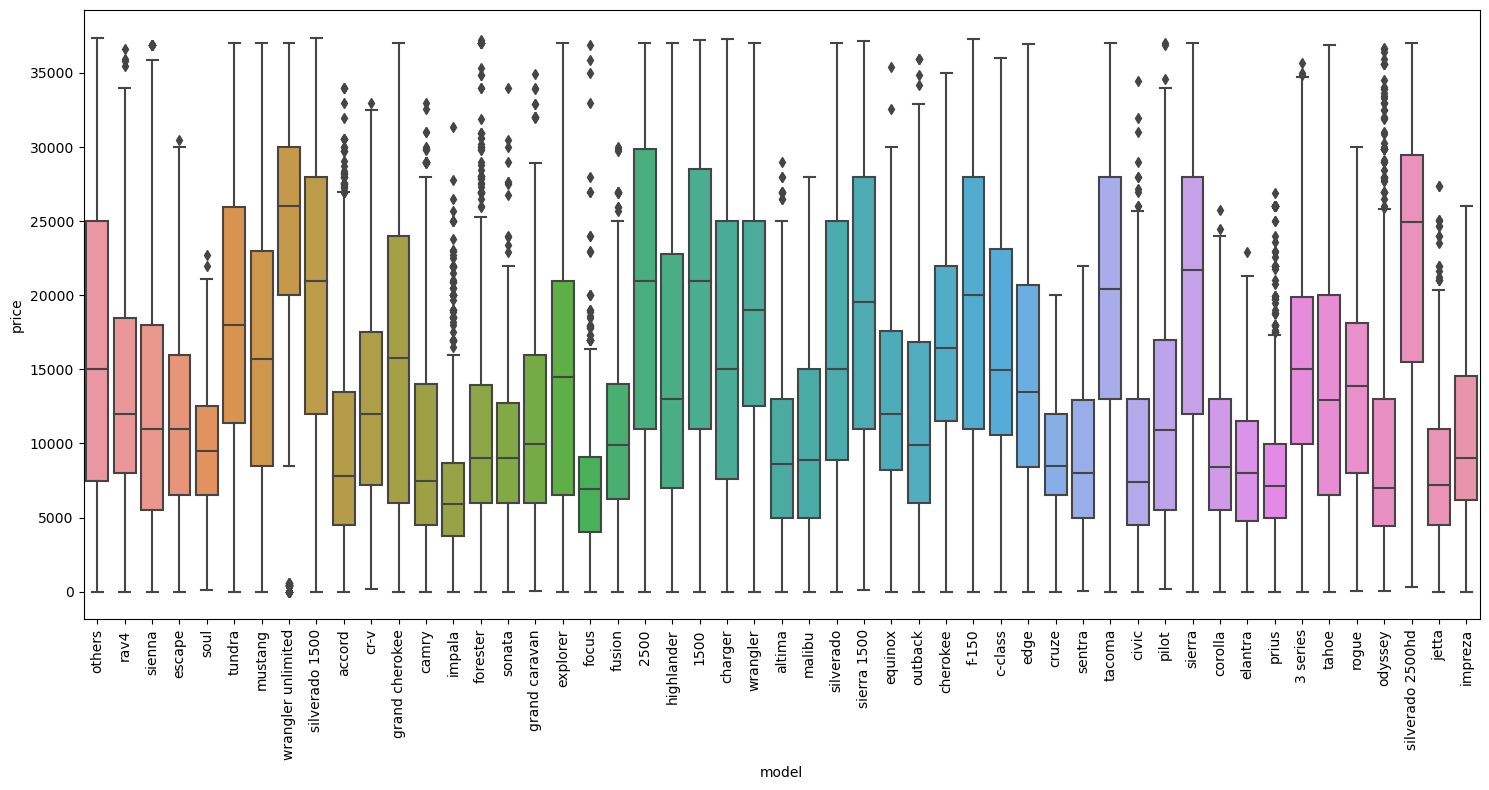

In [42]:
boxplot_cat('model')

## Cylinders

In [43]:
# Changing cylinders of electric cars to other
df['cylinders'] = df.apply(lambda row: 'other' if pd.isnull(row['cylinders']) and row['fuel'] == 'electric' else row['cylinders'], axis=1)

In [44]:
# fills missing values in the 'cylinders' column of the DataFrame df with the last known value for each specific combination of 'manufacturer' and 'model'
#df['cylinders'] = df.groupby(['manufacturer', 'model'])['cylinders'].ffill()

In [45]:
# Group by 'manufacturer' and 'cylinders' and fill missing values in 'cylinders' using forward-fill method
#df['cylinders'] = df.groupby('manufacturer')['cylinders'].transform(lambda x: x.ffill().fillna('6 cylinders'))

In [46]:
cy = df.cylinders.value_counts()

In [47]:
#df['cylinders'] = df['cylinders'].fillna(method='ffill')

# takes the 'cylinders' column in df and categorizes the values. It keeps the original cylinder value if it is one of the top 9 most frequent cylinder values.
# If the cylinder value does not match any of the top 9 values, it replaces the value with 'other'.
df['cylinders'] = df['cylinders'].apply(lambda x: x if str(x) in cy[:9] else 'other')

In [48]:
df.cylinders.value_counts()

other           69614
6 cylinders     53603
4 cylinders     48506
8 cylinders     32006
5 cylinders      1134
10 cylinders      797
3 cylinders       336
12 cylinders       63
Name: cylinders, dtype: int64

# Fuel

In [49]:
df['fuel'].unique()

array(['gas', 'other', 'hybrid', 'diesel', 'electric', nan], dtype=object)

In [50]:
df['fuel'].isnull().sum()

1217

In [51]:
# Group by manufacturer and model, then fill null values in 'fuel' with the corresponding non-null value
df['fuel'] = df.groupby(['manufacturer', 'model'])['fuel'].ffill()
df['type'] = df['type'].fillna(method='ffill')

In [52]:
df['fuel'].isnull().sum()

0

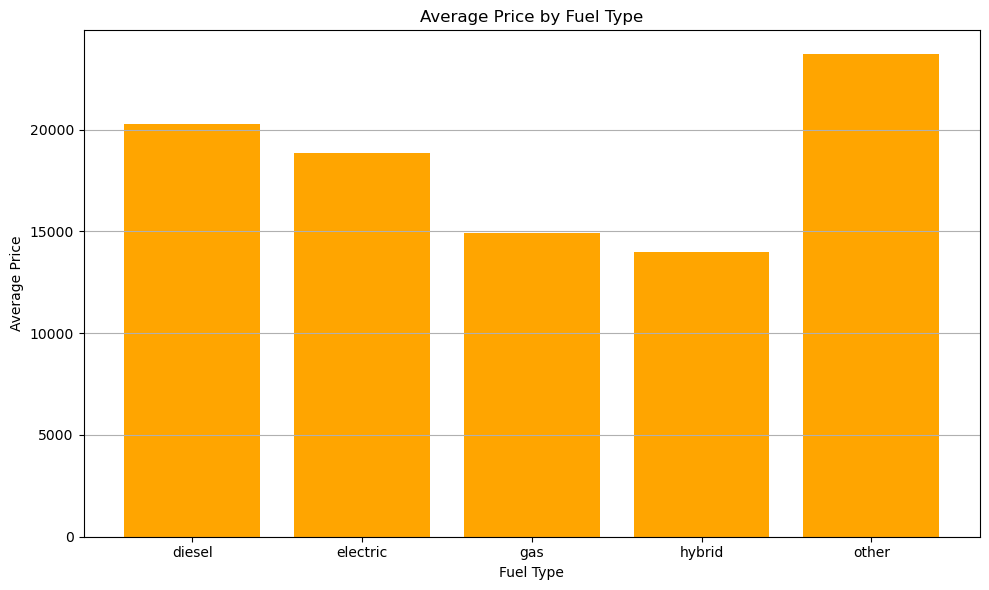

In [53]:
# Group by 'fuel' and calculate the average 'price' for each category
price_avg = df.groupby('fuel')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(price_avg['fuel'], price_avg['price'], color = 'orange')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.grid(axis='y')
plt.show()


# odometer

In [54]:
df['odometer'].unique()
df['odometer'].isnull().sum()

0

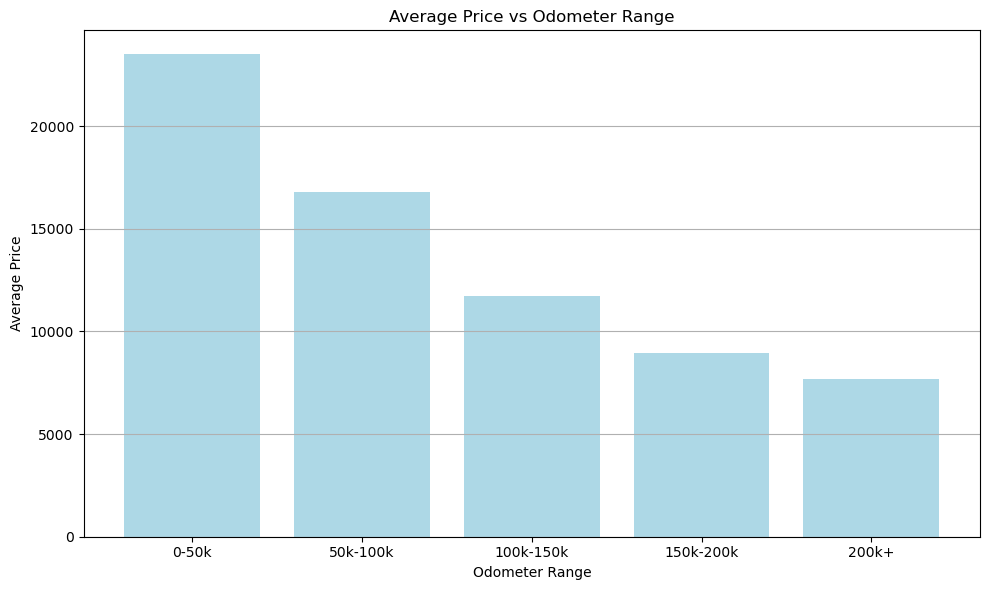

In [55]:
# Define the ranges for 'Odometer'
odom_ranges = [0, 50000, 100000, 150000, 200000, df['odometer'].max()]

# Label for each range
odom_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

# Bin the 'Odometer' column and calculate the average 'price' for each range
df['Odometer_Range'] = pd.cut(df['odometer'], bins=odom_ranges, labels=odom_labels, right=False)
price_avg = df.groupby('Odometer_Range')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(price_avg['Odometer_Range'], price_avg['price'], color='lightblue')
plt.xlabel('Odometer Range')
plt.ylabel('Average Price')
plt.title('Average Price vs Odometer Range')
plt.grid(axis='y')
plt.show()

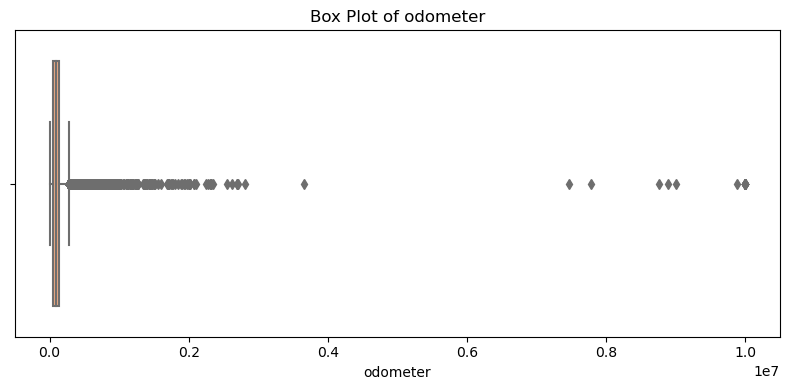

In [56]:
box_plot('odometer')

Q1  odometer  43409.5, Q3  odometer  137600.0
---------------------------------------
IQR for odometer is equal to 94190.5
---------------------------------------


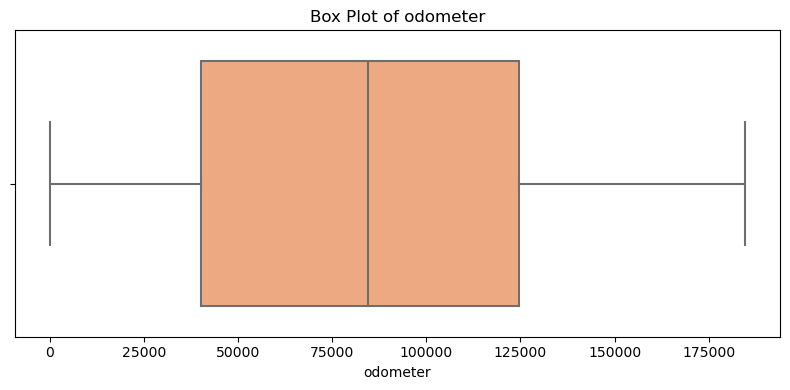

In [57]:

upper_limit_odometer,lower_limit_odometer =IQR('odometer')
df = df[(df['odometer'] < upper_limit_odometer) & (df['odometer'] > 0)]
box_plot('odometer')

------------


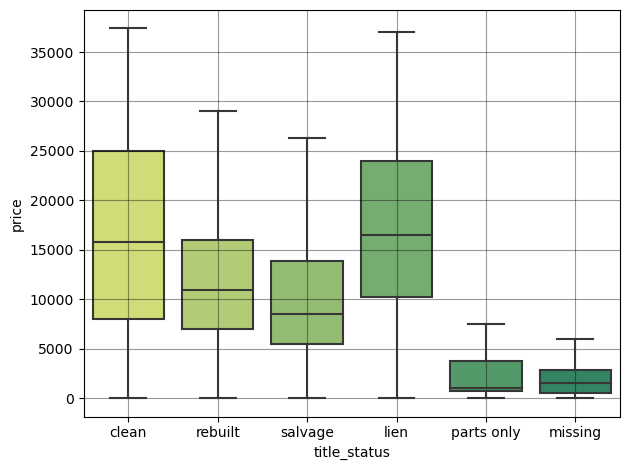

In [58]:
#  box for each category in the 'title_status' column, showing the distribution of 'price' values within each category.
sns.boxplot(data=df,x='title_status',y='price',showfliers=False)
plt.grid(alpha=0.4,color ='k')

-------------

In [59]:
df1 = df.loc[:,['transmission','drive','type','price']]

In [60]:
#df.transmission.info()

In [61]:
df.drive.isnull().sum()

43763

In [62]:
df.drive.value_counts()

fwd    60781
4wd    57616
rwd    25650
Name: drive, dtype: int64

In [63]:
# to create a model for predicting drive {4wd,rwd,fwd} we need to create dataset from dataset
data_drive = df[~df['drive'].isnull()]#include all data that is not null at drive column
# contain all rows which contain null values in drive column
data_nan_drive = df[df['drive'].isnull()][['cylinders','fuel','transmission','type']].dropna()

#select the columns that we can see that it is affect the drive(target)
data_drive = data_drive[['cylinders','fuel','transmission','type','drive']]


#data up to 200000+ to predict only 3 values thats enough for that
#we will drop all rows that contan NULL values

data_drive.dropna(inplace=True)
data_drive.reset_index(inplace=True,drop=True)


In [64]:
data_drive.drive.value_counts()

fwd    60781
4wd    57616
rwd    25650
Name: drive, dtype: int64

In [65]:
# Downsampling function
# Downsample the input DataFrame data by balancing the class distribution.
def returnDataWithSize(data,target,min_class):

    classes = dict(data[target].value_counts())
    
    index = np.array([])
    for clas in classes:
        
        class_index = data[data[target] == clas].index
        sample=list(np.random.choice(class_index,classes[min_class],replace=False))
        
        index = np.concatenate((sample,index))
    return data.iloc[index,:]

In [66]:
data_drive = returnDataWithSize(data_drive,'drive','rwd')

In [67]:

for col in data_drive.iloc[:,0:-1]:
    encoder = LabelEncoder()
    data_drive[col] = encoder.fit_transform(data_drive[col])
    data_nan_drive[col] = encoder.transform(data_nan_drive[col])
    
X = data_drive.iloc[:,0:-1].values
y = data_drive.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape, y_train.shape

((61560, 4), (61560,))

In [69]:
RM = RandomForestClassifier(max_depth=10,max_features=4,min_samples_split=2,criterion='gini')

In [70]:
RM.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=4)

In [71]:
print(classification_report(y_test,RM.predict(X_test)))

              precision    recall  f1-score   support

         4wd       0.63      0.79      0.70      5188
         fwd       0.75      0.61      0.67      5138
         rwd       0.67      0.62      0.65      5064

    accuracy                           0.68     15390
   macro avg       0.68      0.68      0.67     15390
weighted avg       0.68      0.68      0.67     15390



In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187810 entries, 1 to 290127
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            187810 non-null  int32   
 1   manufacturer    187810 non-null  object  
 2   model           187810 non-null  object  
 3   condition       187810 non-null  object  
 4   cylinders       187810 non-null  object  
 5   fuel            187810 non-null  object  
 6   odometer        187810 non-null  float64 
 7   title_status    183742 non-null  object  
 8   transmission    187810 non-null  object  
 9   drive           144047 non-null  object  
 10  type            187810 non-null  object  
 11  paint_color     146128 non-null  object  
 12  state           187810 non-null  object  
 13  price           187810 non-null  int64   
 14  Odometer_Range  187810 non-null  category
dtypes: category(1), float64(1), int32(1), int64(1), object(11)
memory usage: 21.0+ MB


In [73]:
df[df.drive.isnull()][['cylinders','fuel','transmission','type','drive']][50:100]

,cylinders,fuel,transmission,type,drive
447,other,gas,manual,sedan,NaN
452,other,gas,automatic,sedan,NaN
453,6 cylinders,gas,automatic,SUV,NaN
472,other,gas,automatic,sedan,NaN
478,4 cylinders,gas,automatic,sedan,NaN
490,8 cylinders,gas,other,pickup,NaN
497,other,gas,automatic,other,NaN
507,other,other,other,hatchback,NaN
511,other,gas,automatic,SUV,NaN
523,other,gas,automatic,hatchback,NaN


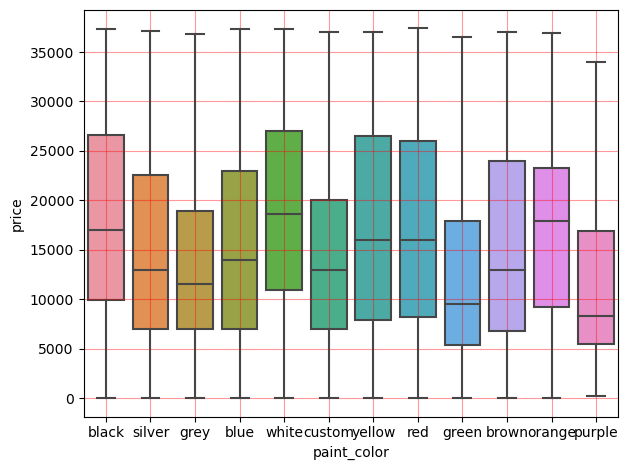

In [74]:
sns.boxplot(data=df,x='paint_color',y='price',showfliers=False)
plt.grid(alpha=0.4,color ='r')

In [75]:
new = df.dropna()
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116847 entries, 4 to 290125
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            116847 non-null  int32   
 1   manufacturer    116847 non-null  object  
 2   model           116847 non-null  object  
 3   condition       116847 non-null  object  
 4   cylinders       116847 non-null  object  
 5   fuel            116847 non-null  object  
 6   odometer        116847 non-null  float64 
 7   title_status    116847 non-null  object  
 8   transmission    116847 non-null  object  
 9   drive           116847 non-null  object  
 10  type            116847 non-null  object  
 11  paint_color     116847 non-null  object  
 12  state           116847 non-null  object  
 13  price           116847 non-null  int64   
 14  Odometer_Range  116847 non-null  category
dtypes: category(1), float64(1), int32(1), int64(1), object(11)
memory usage: 13.0+ MB


In [76]:
df.describe(include=["object"]).T

,count,unique,top,freq
manufacturer,187810,21,ford,27686
model,187810,51,others,142618
condition,187810,6,good,62979
cylinders,187810,8,other,65811
fuel,187810,5,gas,163426
title_status,183742,6,clean,177117
transmission,187810,3,automatic,144245
drive,144047,3,fwd,60781
type,187810,13,sedan,55742
paint_color,146128,12,white,36765


In [77]:
new.drop(labels=['model','state'],inplace=True,axis=1)

C:\Users\emana\AppData\Local\Temp\ipykernel_20428\812303513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(labels=['model','state'],inplace=True,axis=1)


In [78]:
new.drop(['Odometer_Range'],inplace=True,axis=1)

C:\Users\emana\AppData\Local\Temp\ipykernel_20428\764697598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(['Odometer_Range'],inplace=True,axis=1)


In [79]:
s = list(new.columns)

In [80]:
le = LabelEncoder()

new[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']]=new[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
'paint_color']].apply(le.fit_transform)

C:\Users\emana\AppData\Local\Temp\ipykernel_20428\3431761821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[['manufacturer',


In [81]:
new['odometer'] = new.odometer.astype('int64')

C:\Users\emana\AppData\Local\Temp\ipykernel_20428\81017292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['odometer'] = new.odometer.astype('int64')


---------------------
# Modeling

In [82]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

In [83]:
new

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
4,15,19,2,5,2,138900,0,0,0,0,9,7995
8,11,19,5,5,2,157653,0,0,0,5,5,11995
10,18,7,1,3,2,180000,0,0,0,0,1,700
14,5,19,2,3,2,73228,0,0,1,9,10,20988
16,10,14,0,6,2,79856,0,2,0,12,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
290114,13,9,4,3,2,157000,0,0,1,9,5,5495
290115,14,19,5,5,2,146655,0,0,1,0,1,12995
290119,10,17,2,6,2,135000,0,0,0,10,10,20500
290120,4,15,3,5,2,39,4,0,0,10,10,25550


In [84]:
y= new.price
X= new.drop('price',axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
from sklearn.metrics import r2_score

# `RandomForestRegressor`

In [87]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [88]:
R2_score = r2_score(y_test, y_pred)*100
score_rfr = result(y_test, y_pred)
score_data['Linear Regression'] = score_rfr
print('R2_score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2_score:  0.8568
Mean squared error:  13532276.77
Mean absolute error:  2072.51
Root mean squared error:  3678.62


# `K-Nearest Neighbour`


In [89]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [90]:
score_knn = result(y_test, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.4870
Mean squared error:  48485570.81
Mean absolute error:  4792.34
Root mean squared error:  6963.16


# `AdaBoost Regressor `

In [91]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [92]:
score_abr = result(y_test, y_pred)
score_data['AdaBoost Regressor'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.8642
Mean squared error:  12837704.26
Mean absolute error:  1774.86
Root mean squared error:  3582.97


# `xgboost`

In [93]:
import xgboost as xgb

In [94]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [95]:
score_xg = result(y_test, y_pred)
score_data['xg XGBRegressor'] = score_xg
print('R2 score: ', score_xg[0])
print('Mean squared error: ', score_xg[2])
print('Mean absolute error: ', score_xg[3])
print('Root mean squared error: ', score_xg[4])

R2 score:  0.8539
Mean squared error:  13807974.00
Mean absolute error:  1917.03
Root mean squared error:  3715.91


***

# results

In [98]:
score_data

,Linear Regression,K-Nearest Neighbour,AdaBoost Regressor,xg XGBRegressor
R2 Score,0.8568,0.4870,0.8642,0.8539
Accuracy(%),85.6808,48.6950,86.4158,85.3891
Mean Squared Error,13532276.77,48485570.81,12837704.26,13807974.00
Mean Absolute Error,2072.51,4792.34,1774.86,1917.03
Root MSE,3678.62,6963.16,3582.97,3715.91


***

# fine-tune

In [99]:
ABR1 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=350,learning_rate=0.1)
ABR1.fit(X_train, y_train)
y_pred = ABR1.predict(X_test)

In [100]:
score_abr = result(y_test, y_pred)
score_data['AdaBoost Regressor_1'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.8691
Mean squared error:  12370044.40
Mean absolute error:  1755.08
Root mean squared error:  3517.11


In [101]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=350,learning_rate=0.01)
ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [102]:
score_abr = result(y_test, y_pred)
score_data['AdaBoost Regressor_2'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.8586
Mean squared error:  13362611.03
Mean absolute error:  1805.34
Root mean squared error:  3655.49


In [103]:
score_data

,Linear Regression,K-Nearest Neighbour,AdaBoost Regressor,xg XGBRegressor,AdaBoost Regressor_1,AdaBoost Regressor_2
R2 Score,0.8568,0.4870,0.8642,0.8539,0.8691,0.8586
Accuracy(%),85.6808,48.6950,86.4158,85.3891,86.9107,85.8604
Mean Squared Error,13532276.77,48485570.81,12837704.26,13807974.00,12370044.40,13362611.03
Mean Absolute Error,2072.51,4792.34,1774.86,1917.03,1755.08,1805.34
Root MSE,3678.62,6963.16,3582.97,3715.91,3517.11,3655.49


***

In [104]:
test = pd.read_csv('test.csv')
test

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,316575,7313399730,2018.0,honda,civic,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,NaN,sedan,NaN,or,44.971430,-123.018548,2021-04-27T10:09:18-0700
1,97903,7308035814,2017.0,cadillac,cts 2.0 luxury sedan 4d,good,NaN,gas,41147.0,clean,other,NaN,NaN,sedan,red,fl,28.040000,-81.960000,2021-04-16T20:21:00-0400
2,357880,7317063645,2006.0,toyota,sienna,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,NaN,mini-van,grey,tx,32.737108,-97.084585,2021-05-04T20:45:23-0500
3,413008,7310376764,2016.0,mitsubishi,outlander sel sport,good,NaN,other,29430.0,clean,other,NaN,NaN,SUV,white,wi,43.700000,-87.740000,2021-04-21T11:20:50-0500
4,330300,7309848062,2017.0,audi,a6 3.0t premium plus sedan,good,6 cylinders,gas,24238.0,clean,automatic,NaN,NaN,sedan,white,pa,40.790000,-77.850000,2021-04-20T12:10:51-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124336,221602,7306681704,2015.0,ram,3500,excellent,6 cylinders,diesel,123000.0,clean,automatic,rwd,NaN,NaN,white,mt,48.202800,-114.303900,2021-04-14T09:29:57-0600
124337,353429,7315798680,2007.0,nissan,murano.awd,NaN,NaN,gas,150000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,tx,30.242800,-97.765800,2021-05-02T11:47:54-0500
124338,284120,7314818147,2015.0,dodge,dart sxt,excellent,4 cylinders,gas,90430.0,clean,automatic,fwd,NaN,NaN,white,oh,41.563600,-81.573300,2021-04-30T11:22:19-0400
124339,273569,7308055654,2001.0,chevrolet,2500,NaN,NaN,gas,137000.0,clean,automatic,NaN,NaN,NaN,NaN,ny,42.190134,-78.041382,2021-04-16T21:15:13-0400


In [105]:
new.columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'price'],
      dtype='object')

In [106]:
#drop the above feature
test.drop([ 'Unnamed: 0','model', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)
test

,id,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,7313399730,2018.0,honda,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,sedan,NaN
1,7308035814,2017.0,cadillac,good,NaN,gas,41147.0,clean,other,NaN,sedan,red
2,7317063645,2006.0,toyota,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,mini-van,grey
3,7310376764,2016.0,mitsubishi,good,NaN,other,29430.0,clean,other,NaN,SUV,white
4,7309848062,2017.0,audi,good,6 cylinders,gas,24238.0,clean,automatic,NaN,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...
124336,7306681704,2015.0,ram,excellent,6 cylinders,diesel,123000.0,clean,automatic,rwd,NaN,white
124337,7315798680,2007.0,nissan,NaN,NaN,gas,150000.0,rebuilt,automatic,NaN,NaN,NaN
124338,7314818147,2015.0,dodge,excellent,4 cylinders,gas,90430.0,clean,automatic,fwd,NaN,white
124339,7308055654,2001.0,chevrolet,NaN,NaN,gas,137000.0,clean,automatic,NaN,NaN,NaN


In [107]:
test.columns,new.columns

(Index(['id', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
        'odometer', 'title_status', 'transmission', 'drive', 'type',
        'paint_color'],
       dtype='object'),
 Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
        'title_status', 'transmission', 'drive', 'type', 'paint_color',
        'price'],
       dtype='object'))

In [108]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

In [109]:
test[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']]=test[['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
'paint_color']].apply(le.fit_transform)

In [110]:
test['year'] = 2023 - test['year']

In [111]:
test['year'] = test['year'].astype(int)
test['odometer'] = test['odometer'].astype(int)

In [112]:
test

,id,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,7313399730,5,16,6,3,2,28898,0,0,1,9,12
1,7308035814,6,6,2,8,2,41147,0,2,3,9,8
2,7317063645,17,38,0,5,2,165500,0,0,3,5,5
3,7310376764,7,29,2,8,4,29430,0,2,3,0,10
4,7309848062,6,3,2,5,2,24238,0,0,3,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...
124336,7306681704,8,33,0,5,0,123000,0,0,2,13,10
124337,7315798680,16,30,6,8,2,150000,4,0,3,13,12
124338,7314818147,8,10,0,3,2,90430,0,0,1,13,10
124339,7308055654,22,7,6,8,2,137000,0,0,3,13,12


In [113]:
pred =  ABR1.predict(test[wanted_test_columns])

In [114]:
pred

array([20495.        , 23990.        ,  9995.        , ...,
        9499.        ,  7999.        , 22973.45833333])

In [115]:
submission =pd.read_csv('Sample_Submition.csv')
submission

,id,Target
0,7313399730,0.0
1,7308035814,0.0
2,7317063645,0.0
3,7310376764,0.0
4,7309848062,0.0
...,...,...
124336,7306681704,0.0
124337,7315798680,0.0
124338,7314818147,0.0
124339,7308055654,0.0


In [116]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =pred # our model predictions on the test dataset
submission

,id,Target
0,7313399730,20495.000000
1,7308035814,23990.000000
2,7317063645,9995.000000
3,7310376764,22990.000000
4,7309848062,25452.000000
...,...,...
124336,7306681704,27500.000000
124337,7315798680,11991.000000
124338,7314818147,9499.000000
124339,7308055654,7999.000000


In [117]:
submission

,id,Target
0,7313399730,20495.000000
1,7308035814,23990.000000
2,7317063645,9995.000000
3,7310376764,22990.000000
4,7309848062,25452.000000
...,...,...
124336,7306681704,27500.000000
124337,7315798680,11991.000000
124338,7314818147,9499.000000
124339,7308055654,7999.000000


In [118]:
submission.to_csv('ABR1_submission.csv', index=False)

In [119]:
for i in score_data.columns:
    score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']

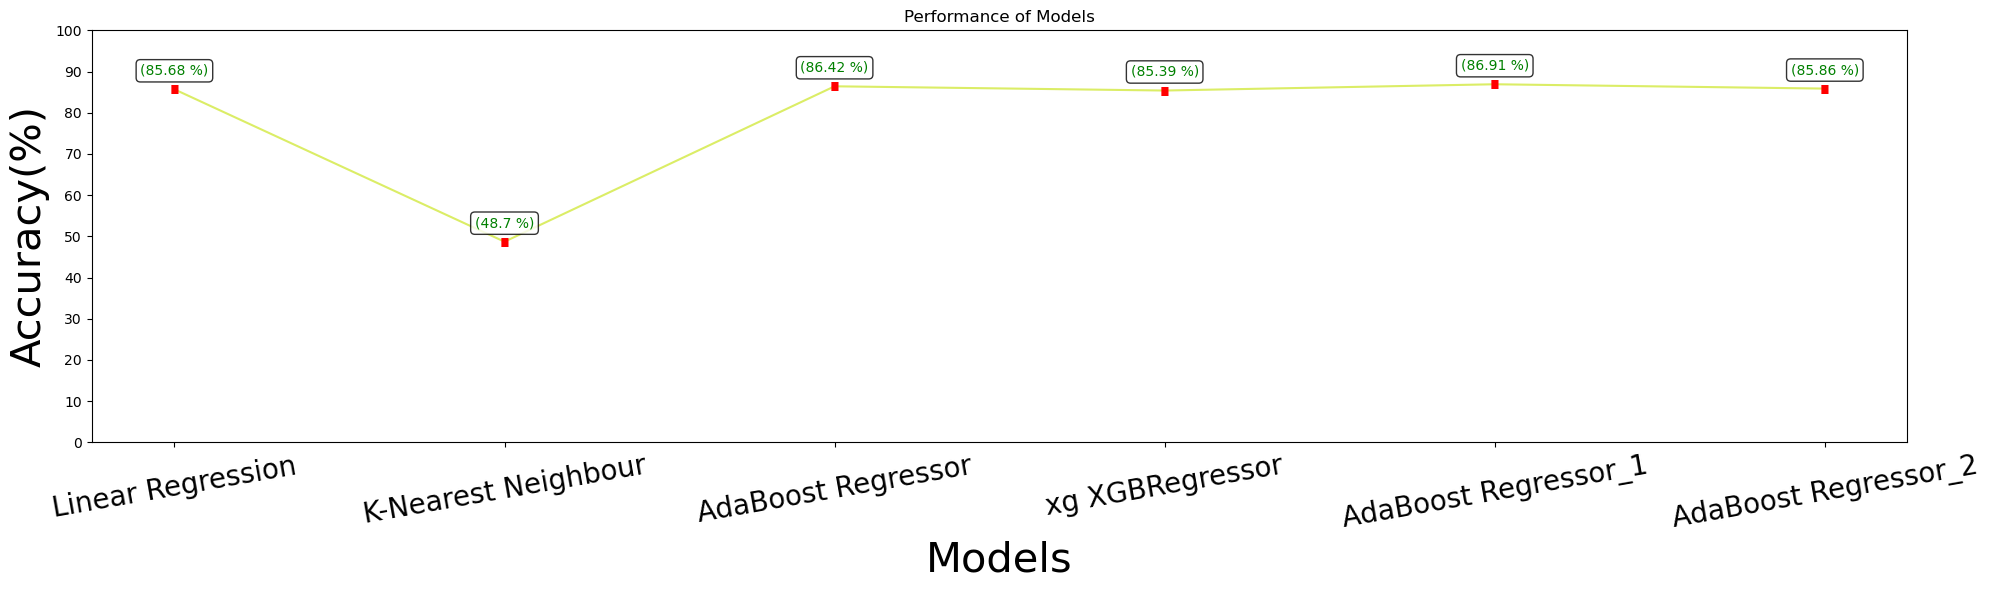

In [120]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()